#NAME - SUMIT BANSIYA

#ROLL NO. - 25901337

#🧪 Practical 1 – EASY
Logistic Regression (Baseline Model)

#1️⃣ Objective

To build a baseline binary classification model using Logistic Regression to predict customer churn and evaluate it using ROC-AUC score.

#2️⃣ Dataset Selection

Chosen Dataset:
DS5 – Telco Customer Churn

Link:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

✅ Why this dataset?

Target variable Churn is binary (Yes/No) → perfect for Logistic Regression

Real-world business problem

Contains both categorical and numerical features

Commonly used for baseline classification models

🔹 Cell 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


🔹 Cell 2: Load Dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


🔹 Cell 3: Basic EDA (Mandatory)


In [3]:
df.shape    #shape


(7043, 21)

In [4]:
df.isnull().sum()   #MISSING VALUES SUM


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df['Churn'].value_counts()   #Target distribution


,count
Churn,
No,5174
Yes,1869


🔹 Cell 4: Target Distribution Plot (Plot 1)

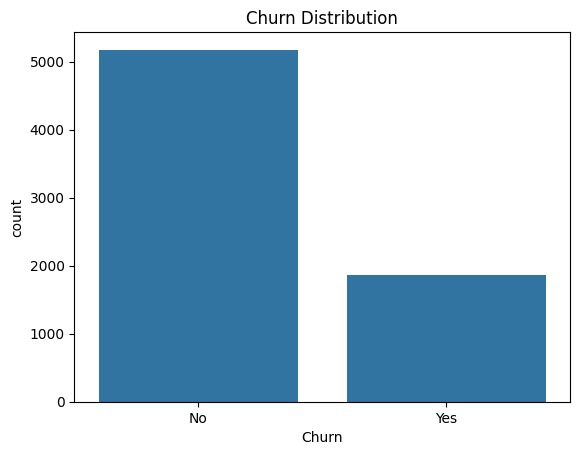

In [6]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


🔹 Cell 5: Numeric Feature Distribution (Plot 2)

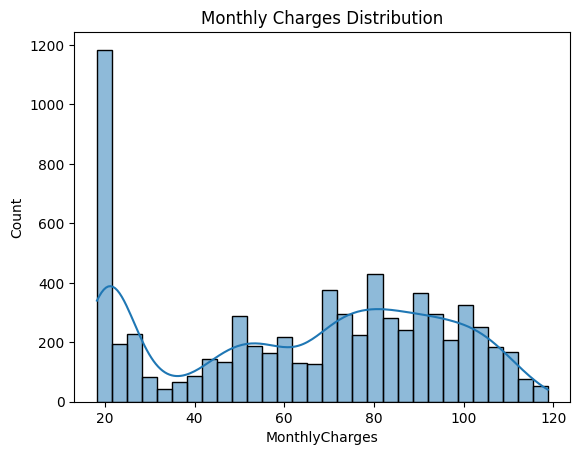

In [7]:
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


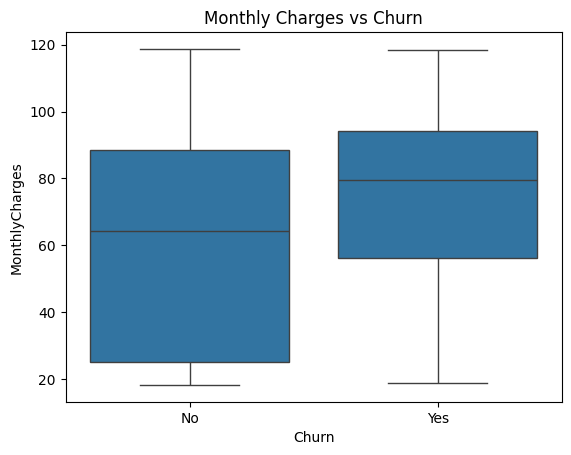

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


🔹 Cell 6: Data Preprocessing

In [9]:
df['Churn'].dtype
df['Churn'].unique()


array(['No', 'Yes'], dtype=object)

In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [11]:
df['Churn'].unique()


array([0, 1])

In [12]:

df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-2576541415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
# 🔹 Cell : Drop Customer ID
df.drop('customerID', axis=1, inplace=True)


In [16]:
# 🔹 Cell : One-Hot Encode Categorical Variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


🔹 Cell 7: Separate Features & Target

In [17]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [19]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


🔹 Cell 8: Train–Validation Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


🔹 Cell 9: Feature Scaling (REQUIRED)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


🔹 Cell 10: Train Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# 🔹 Cell 9: Predict Probabilities
y_val_probs = model.predict_proba(X_val_scaled)[:, 1]


🔹 Cell 11: ROC-AUC Score (MAIN METRIC)

In [25]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_val, y_val_probs)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8415846443979436


🔹 Cell 11: ROC Curve Plot (Final Plot)

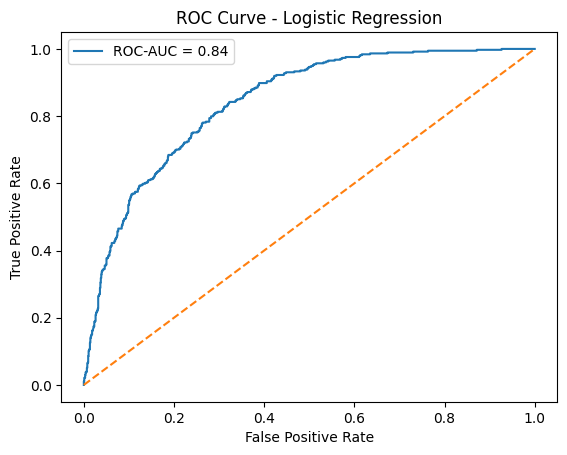

In [26]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_val_probs)

plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


#🔹 Brief Explanation (Easy – Logistic Regression)

The Telco Customer Churn dataset was used to perform binary classification, where the target variable Churn indicates whether a customer leaves the service or not. Basic exploratory data analysis was carried out to understand the data shape, check missing values, and analyze the distribution of the target variable. The Churn column was converted into numeric form (0 for No and 1 for Yes), and categorical features were encoded using one-hot encoding. Feature scaling was applied because Logistic Regression is sensitive to feature magnitude. The dataset was split into training and validation sets while preserving class distribution. A baseline Logistic Regression model was trained, and its performance was evaluated using the ROC-AUC metric, which is suitable for binary classification and class-imbalanced data.